<a href="https://colab.research.google.com/github/ScarrryMary/IT_MIPT_group25-26/blob/main/Seminar_12_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

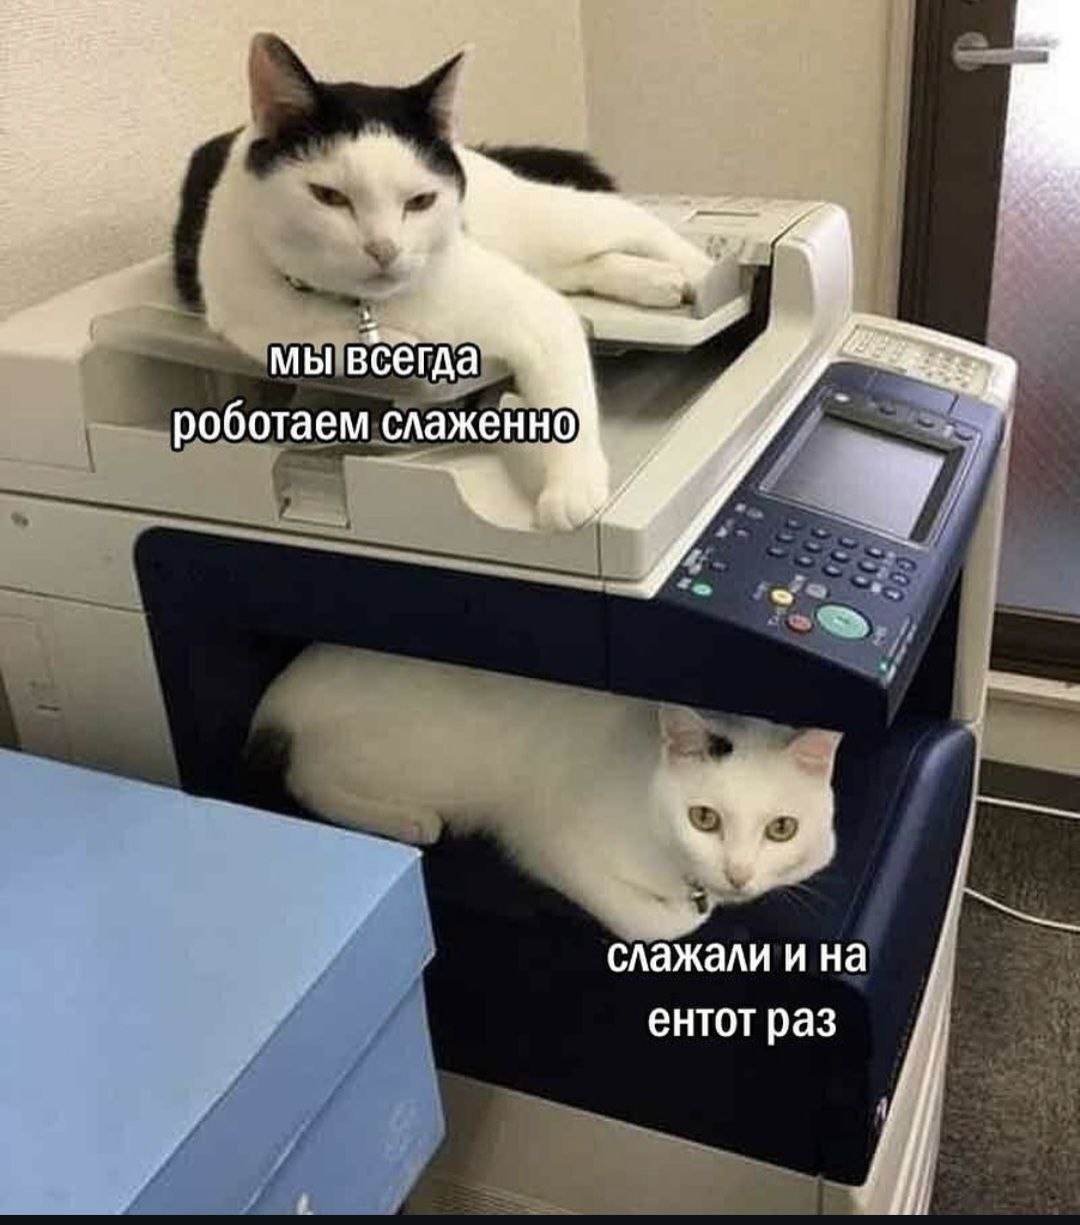

### Задача о скобочной последовательности

**Цель**: Проверить, является ли последовательность скобок правильной (каждая открывающая скобка имеет закрывающую пару и порядок соблюден).

**Алгоритм**:

1. Инициализировать пустой стек.

2. Для каждого символа в строке:

- Если символ — открывающая скобка ((, [, {), поместить её в стек.

- Если символ — закрывающая скобка (), ], }):

- - Если стек пуст — последовательность неверная.

- - Извлечь верхний элемент стека и проверить соответствие скобок.

3. Если после обработки стек пуст — последовательность верная.

In [ ]:
def skobka(s):
    stack = []
    brackets = {")": "(", "]": "[", "}": "{"}
    for char in s:
        if char in brackets.values():  # Открывающая скобка
            stack.append(char)
        elif char in brackets:  # Закрывающая скобка
            if not stack or stack[-1] != brackets[char]:
                return False
            stack.pop()
    return not stack

s = input()
if skobka(s):
  print('Yes')
else:
  print('No')

(){[]}
Yes


# Встроенная куча



In [ ]:
import heapq

# Из пустого списка
heap = []
heapq.heapify(heap)  # Для пустого списка не обязательно

# Из существующего списка
numbers = [5, 2, 8, 1, 9]
heapq.heapify(numbers)  # Преобразует список в кучу за O(n)

print(numbers)  # [1, 2, 8, 5, 9] - минимальный элемент первый

[1, 2, 8, 5, 9]


Основные функции
1. Добавление элемента - **heappush()**

In [ ]:
heap = []
heapq.heappush(heap, 3)
heapq.heappush(heap, 1)
heapq.heappush(heap, 4)
heapq.heappush(heap, 2)
print(heap)  # [1, 2, 4, 3] - минимальный элемент всегда первый

[1, 2, 4, 3]


2. Извлечение минимального элемента - **heappop()**

In [ ]:
min_element = heapq.heappop(heap)
print(min_element)  # 1
print(heap)         # [2, 3, 4] - куча автоматически перестраивается

1
[2, 3, 4]


3. Просмотр минимального элемента без извлечения

In [ ]:
if heap:
    min_element = heap[0]  # Минимальный элемент всегда по индексу 0
    print(min_element)     # 2

2


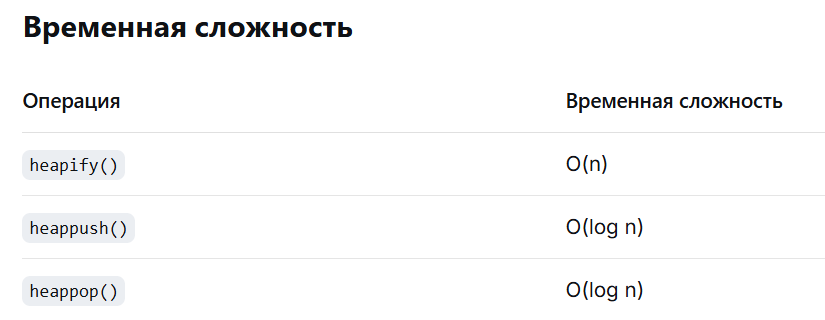

### Создание максимальной кучи
- Храним в куче отрицательные значения оригинальных чисел

- При извлечении преобразуем обратно в положительные

In [ ]:
import heapq

max_heap = []
numbers = [3, 1, 4, 1, 5, 9, 2]

for num in numbers:
    heapq.heappush(max_heap, -num)

print("Max-heap (как хранится):", max_heap)  # [-9, -5, -4, -1, -1, -3, -2]

# Извлечение максимального элемента
largest = -heapq.heappop(max_heap)
print("Максимальный элемент:", largest)  # 9
print("Оставшаяся куча:", [-x for x in max_heap])  # [5, 1, 4, 1, 2, 3]

Max-heap (как хранится): [-9, -4, -5, -1, -1, -3, -2]
Максимальный элемент: 9
Оставшаяся куча: [5, 4, 3, 1, 1, 2]


### Пример 1: Сортировка с помощью кучи

In [ ]:
def heap_sort(arr):
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]

numbers = [3, 1, 4, 1, 5, 9, 2, 6]
sorted_numbers = heap_sort(numbers.copy())
print(sorted_numbers)  # [1, 1, 2, 3, 4, 5, 6, 9]

[1, 1, 2, 3, 4, 5, 6, 9]


### Пример 2: Слежение за медианой в потоке данных

```python
Числа: [1, 2, 3, 4, 5, 6, 7, 8]

Левая половина (max-heap): [4, 3, 2, 1]  → максимум = 4
Правая половина (min-heap): [5, 6, 7, 8] → минимум = 5

Медиана = (4 + 5) / 2 = 4.5
```

In [ ]:
import heapq

class MedianFinder:
    def __init__(self):
        self.max_heap = []  # левая половина (меньшие числа)
        self.min_heap = []  # правая половина (большие числа)

    def add_num(self, num):
        # Добавляем в соответствующую кучу
        if not self.max_heap or num <= -self.max_heap[0]:
            heapq.heappush(self.max_heap, -num)
        else:
            heapq.heappush(self.min_heap, num)

        # Балансируем кучи
        if len(self.max_heap) > len(self.min_heap) + 1:
            heapq.heappush(self.min_heap, -heapq.heappop(self.max_heap))
        elif len(self.min_heap) > len(self.max_heap):
            heapq.heappush(self.max_heap, -heapq.heappop(self.min_heap))

    def find_median(self):
        if len(self.max_heap) == len(self.min_heap):
            return (-self.max_heap[0] + self.min_heap[0]) / 2
        else:
            return -self.max_heap[0]

# Использование
finder = MedianFinder()
for num in [1, 2, 3, 4, 5]:
    finder.add_num(num)
    print(f"Медиана после {num}: {finder.find_median()}")

Медиана после 1: 1
Медиана после 2: 1.5
Медиана после 3: 2
Медиана после 4: 2.5
Медиана после 5: 3


Правила балансировки:

- Левая половина может быть больше правой не более чем на 1 элемент

- Правая половина не может быть больше левой

Пример балансировки:

```python
До балансировки:
max_heap: [3, 1, 2] (размер = 3)
min_heap: [4, 5]    (размер = 2)

Разница размеров = 1 → баланс соблюден
```

```python
До балансировки:
max_heap: [3, 1, 2, 0] (размер = 4)  
min_heap: [4, 5]       (размер = 2)

Разница размеров = 2 → нарушение!
Перемещаем максимум из левой в правую:
max_heap: [2, 1, 0]    (размер = 3)
min_heap: [3, 5, 4]    (размер = 3)
```


# Двоичное дерево поиска (BST)

**Двоичное дерево поиска (BST)** — это тип структуры данных двоичного дерева, в котором каждый узел содержит уникальный ключ и удовлетворяет определенному свойству упорядочения:

- Все узлы в левом поддереве узла содержат значения, строго меньшие, чем значение узла.
- Все узлы в правом поддереве узла содержат значения, строго превышающие значение узла.

Такая структура позволяет эффективно выполнять операции по поиску, вставке и удалению элементов, особенно когда дерево остается сбалансированным.

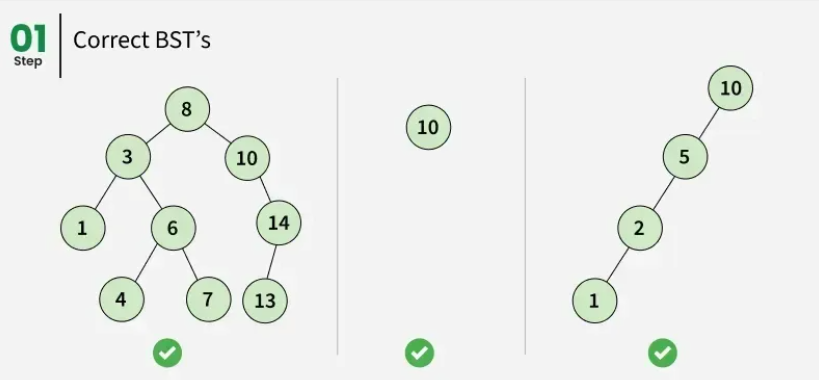

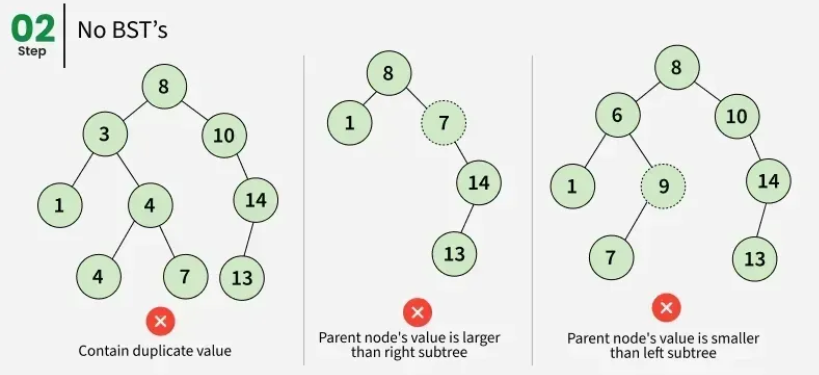

## Вставка

Все узлы имеют разные значения в BST, и новое значение для вставки отсутствует в BST.

Новый ключ вставляется в позицию, поддерживающую свойство BST. Мы начинаем с корня и движемся вниз: если значение меньше, идём влево; Если больше — направо. Продолжаем, пока не найдём свободное место, где узел можно разместить, не нарушая свойство BST, и вставляем его туда как новый лист.

Пример:

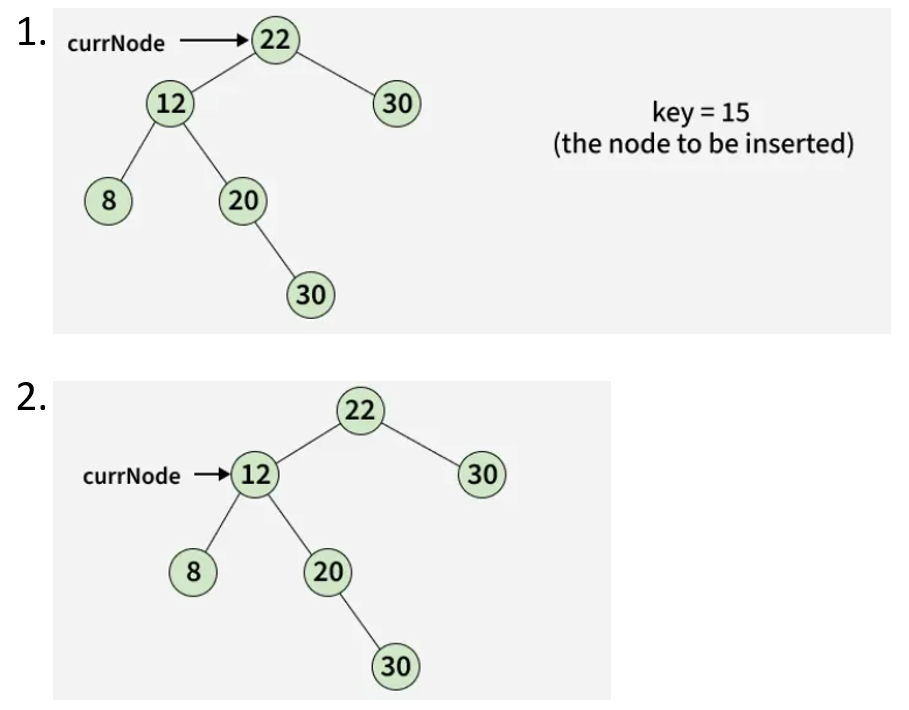

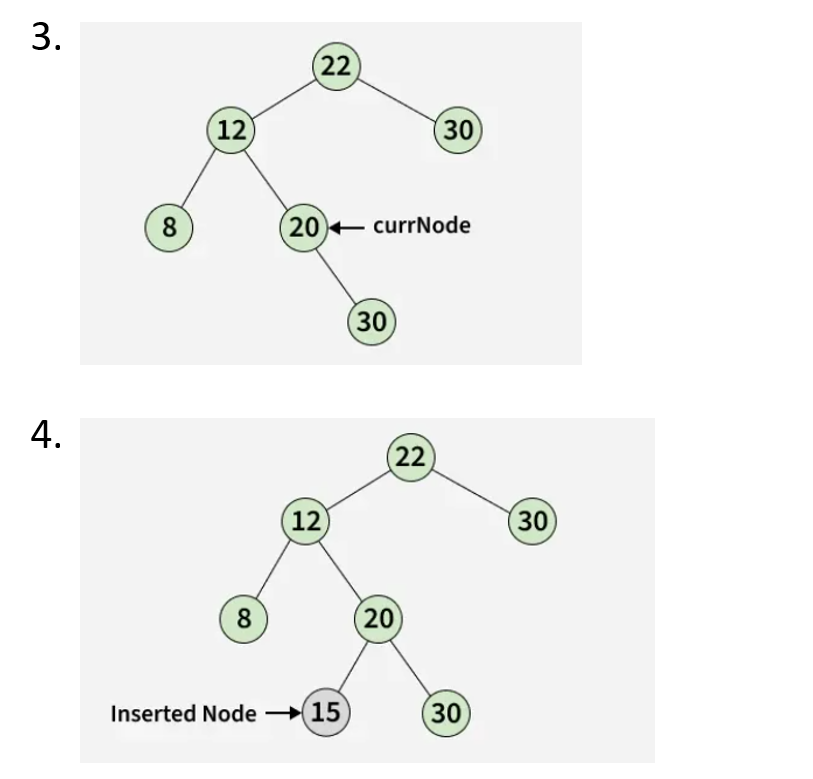

```python
def insert(self, value):
        """Вставка элемента в дерево"""
        if self.root is None:
            self.root = TreeNode(value)
        else:
            self._insert_recursive(self.root, value)
    
    def _insert_recursive(self, node, value):
        """Рекурсивная вспомогательная функция для вставки"""
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(value)
            else:
                self._insert_recursive(node.left, value)
        elif value > node.value:
            if node.right is None:
                node.right = TreeNode(value)
            else:
                self._insert_recursive(node.right, value)
        # Если value == node.value, игнорируем (не добавляем дубликаты)
```

## Поиск

```python
def search(self, value):
        """Поиск элемента в дереве"""
        return self._search_recursive(self.root, value)
    
    def _search_recursive(self, node, value):
        """Рекурсивная вспомогательная функция для поиска"""
        if node is None:
            return False
        if value == node.value:
            return True
        elif value < node.value:
            return self._search_recursive(node.left, value)
        else:
            return self._search_recursive(node.right, value)
```

## Удаление

**Случай 1**: Узел не имеет потомков (Leaf Node)

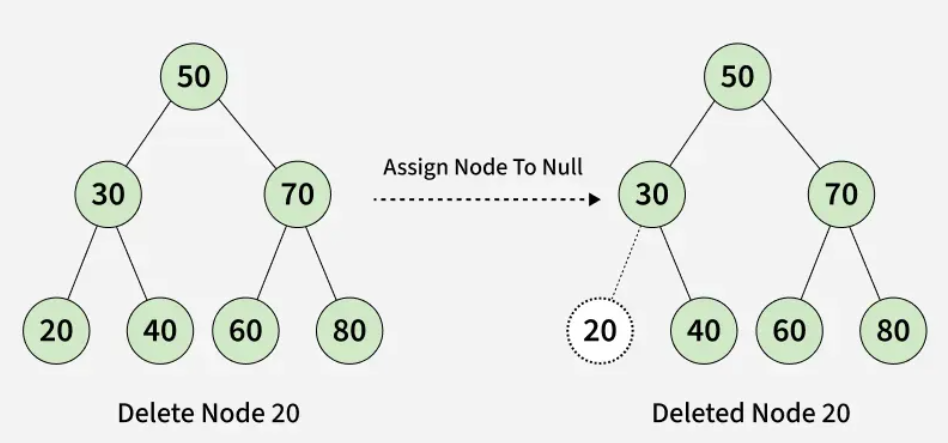

**Случай 2:** У узла есть один потомок

Если у целевого узла только один потомок, мы удаляем узел и подключаем его родителя напрямую к единственному потомку. Таким образом, дерево остаётся действительным после удаления целевого узла.

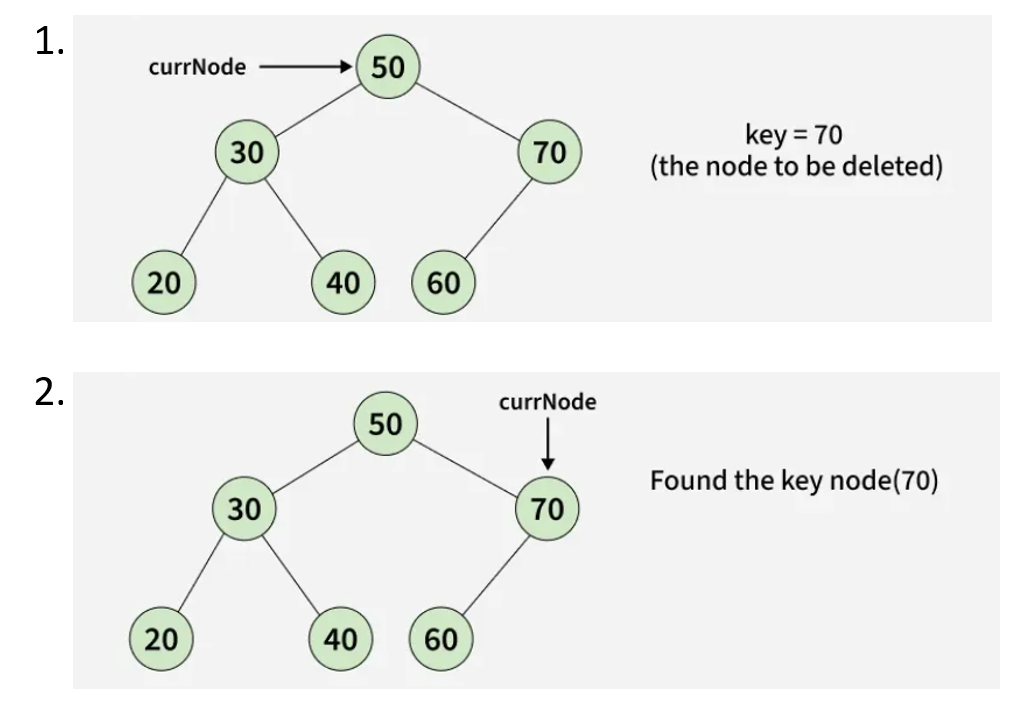

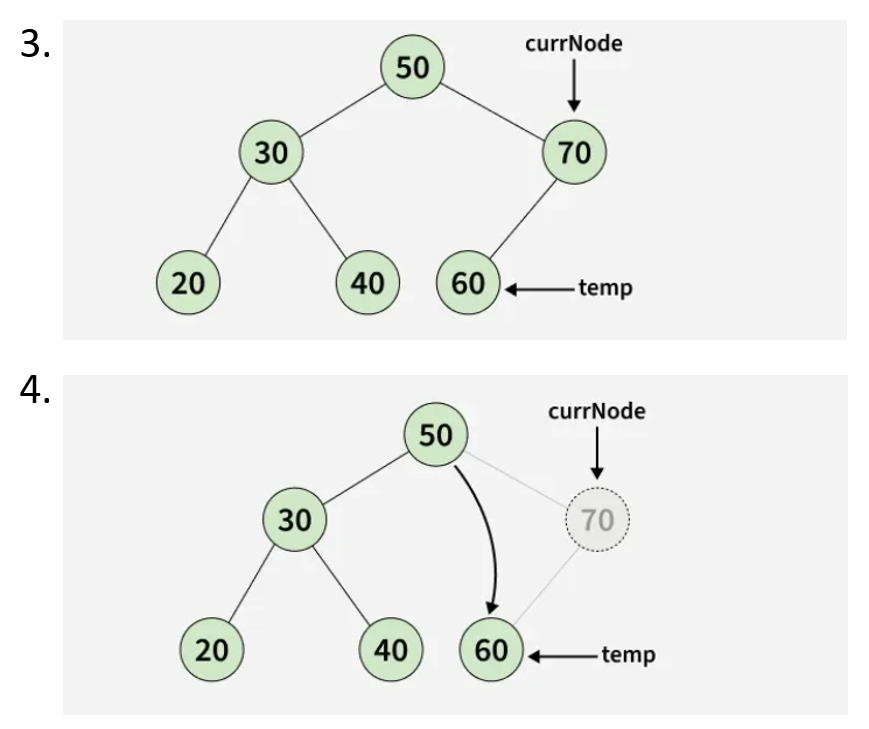

**Случай 3**: Узел имеет двух детей

Если у целевого узла два потомка, удаление немного сложнее.

Чтобы сохранить свойство BST, нам нужно найти замену для целевой ноды. Замена может быть следующим образом:

- Преемник по порядку — наименьшее значение в правом поддереве, которое является следующим значением по величине целевого узла.
- Предшественник в порядке — наибольшее значение в левом поддереве, которое является следующим меньшим значением целевого узла.

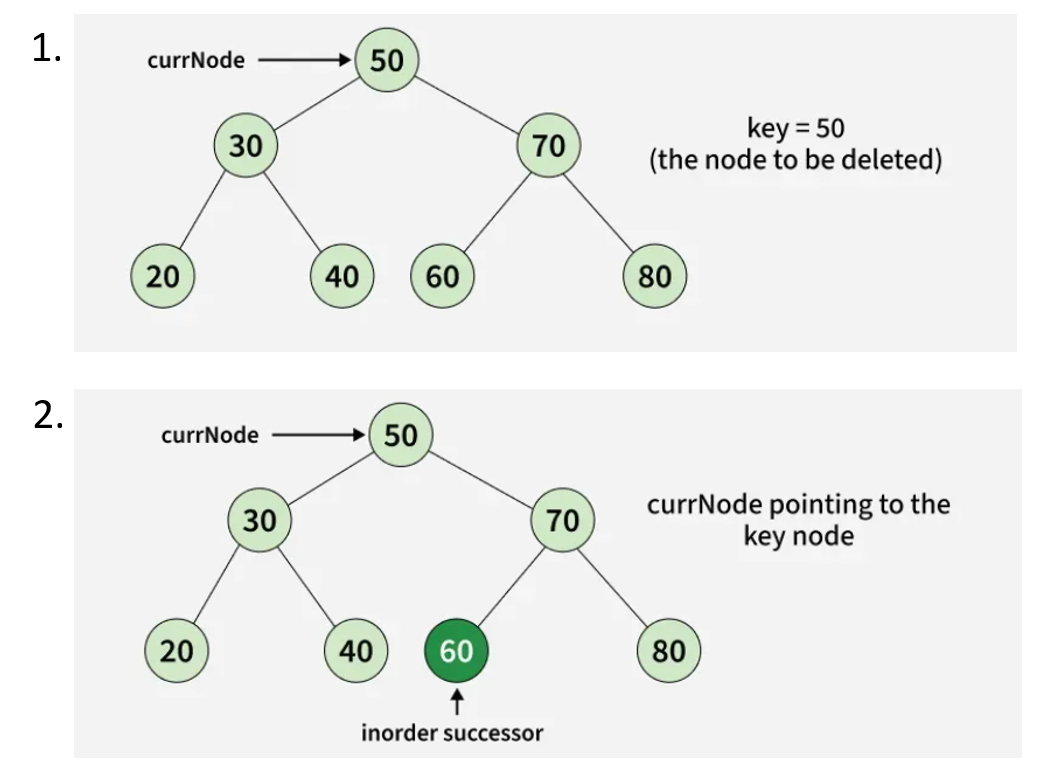

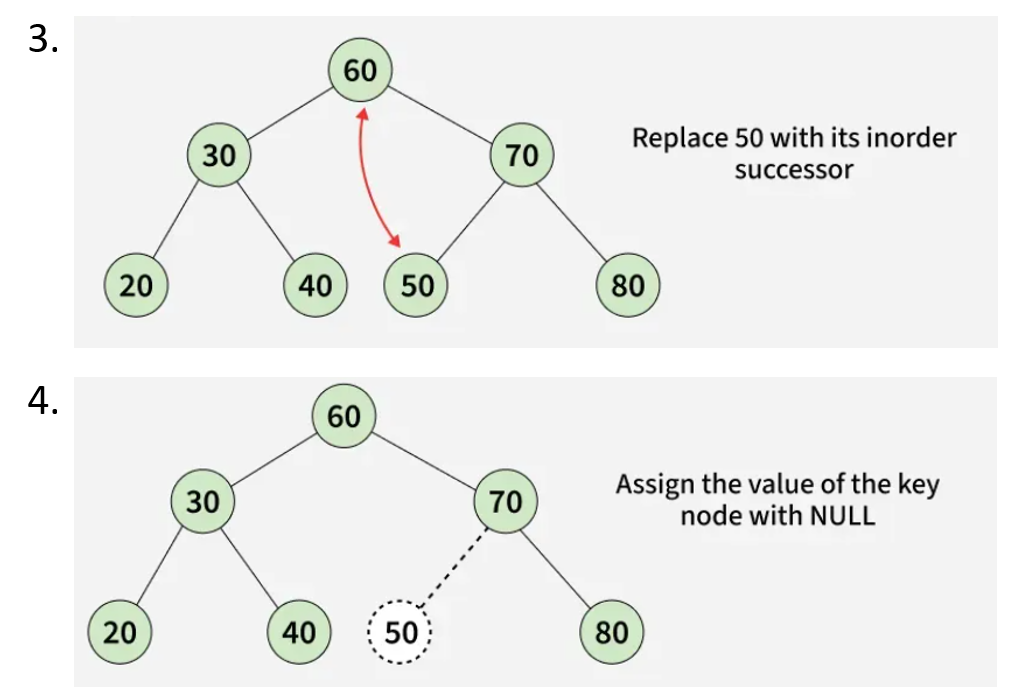

```python
def delete(self, value):
        """Удаление элемента из дерева"""
        self.root = self._delete_recursive(self.root, value)
    
    def _delete_recursive(self, node, value):
        """Рекурсивная вспомогательная функция для удаления"""
        if node is None:
            return node
        
        if value < node.value:
            node.left = self._delete_recursive(node.left, value)
        elif value > node.value:
            node.right = self._delete_recursive(node.right, value)
        else:
            # Найден узел для удаления
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            else:
                # У узла есть два потомка
                # Находим минимальный элемент в правом поддереве
                min_node = self._find_min(node.right)
                node.value = min_node.value
                node.right = self._delete_recursive(node.right, min_node.value)
        
        return node
  ```

### Полный код и другие свойства:

In [ ]:
class TreeNode:
    """Узел бинарного дерева"""
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinarySearchTree:
    """Бинарное дерево поиска"""

    def __init__(self):
        self.root = None

    def insert(self, value):
        """Вставка элемента в дерево"""
        if self.root is None:
            self.root = TreeNode(value)
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        """Рекурсивная вспомогательная функция для вставки"""
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(value)
            else:
                self._insert_recursive(node.left, value)
        elif value > node.value:
            if node.right is None:
                node.right = TreeNode(value)
            else:
                self._insert_recursive(node.right, value)
        # Если value == node.value, игнорируем (не добавляем дубликаты)

    def search(self, value):
        """Поиск элемента в дереве"""
        return self._search_recursive(self.root, value)

    def _search_recursive(self, node, value):
        """Рекурсивная вспомогательная функция для поиска"""
        if node is None:
            return False
        if value == node.value:
            return True
        elif value < node.value:
            return self._search_recursive(node.left, value)
        else:
            return self._search_recursive(node.right, value)

    def delete(self, value):
        """Удаление элемента из дерева"""
        self.root = self._delete_recursive(self.root, value)

    def _delete_recursive(self, node, value):
        """Рекурсивная вспомогательная функция для удаления"""
        if node is None:
            return node

        if value < node.value:
            node.left = self._delete_recursive(node.left, value)
        elif value > node.value:
            node.right = self._delete_recursive(node.right, value)
        else:
            # Найден узел для удаления
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            else:
                # У узла есть два потомка
                # Находим минимальный элемент в правом поддереве
                min_node = self._find_min(node.right)
                node.value = min_node.value
                node.right = self._delete_recursive(node.right, min_node.value)

        return node

    def _find_min(self, node):
        """Находит узел с минимальным значением в поддереве"""
        current = node
        while current.left is not None:
            current = current.left
        return current

    def _find_max(self, node):
        """Находит узел с максимальным значением в поддереве"""
        current = node
        while current.right is not None:
            current = current.right
        return current

    def inorder_traversal(self):
        """Центрированный обход (левый-корень-правый) - возвращает отсортированные значения"""
        result = []
        self._inorder_recursive(self.root, result)
        return result

    def _inorder_recursive(self, node, result):
        """Рекурсивный центрированный обход"""
        if node is not None:
            self._inorder_recursive(node.left, result)
            result.append(node.value)
            self._inorder_recursive(node.right, result)

    def preorder_traversal(self):
        """Прямой обход (корень-левый-правый)"""
        result = []
        self._preorder_recursive(self.root, result)
        return result

    def _preorder_recursive(self, node, result):
        """Рекурсивный прямой обход"""
        if node is not None:
            result.append(node.value)
            self._preorder_recursive(node.left, result)
            self._preorder_recursive(node.right, result)

    def postorder_traversal(self):
        """Обратный обход (левый-правый-корень)"""
        result = []
        self._postorder_recursive(self.root, result)
        return result

    def _postorder_recursive(self, node, result):
        """Рекурсивный обратный обход"""
        if node is not None:
            self._postorder_recursive(node.left, result)
            self._postorder_recursive(node.right, result)
            result.append(node.value)

    def get_min(self):
        """Получить минимальное значение в дереве"""
        if self.root is None:
            return None
        return self._find_min(self.root).value

    def get_max(self):
        """Получить максимальное значение в дереве"""
        if self.root is None:
            return None
        return self._find_max(self.root).value

    def height(self):
        """Высота дерева"""
        return self._height_recursive(self.root)

    def _height_recursive(self, node):
        """Рекурсивный расчет высоты"""
        if node is None:
            return 0
        return 1 + max(self._height_recursive(node.left),
                      self._height_recursive(node.right))

    def size(self):
        """Количество узлов в дереве"""
        return self._size_recursive(self.root)

    def _size_recursive(self, node):
        """Рекурсивный подсчет количества узлов"""
        if node is None:
            return 0
        return 1 + self._size_recursive(node.left) + self._size_recursive(node.right)

    def print_tree(self):
        """Вывод дерева в виде структурированного списка"""
        result = self._build_tree_structure(self.root, 0)
        print(result)
        for level in result:
            print("  " * level[0] + str(level[1]))

    def _build_tree_structure(self, node, depth):
        """Вспомогательная функция для визуализации дерева"""
        if node is None:
            return []
        left = self._build_tree_structure(node.left, depth + 1)
        right = self._build_tree_structure(node.right, depth + 1)
        return left + [(depth, node.value)] + right


bst = BinarySearchTree()

# Вставляем элементы
values = [50, 30, 70, 20, 40, 60, 80]
for value in values:
    bst.insert(value)

print("Бинарное дерево поиска:")
bst.print_tree()

print(f"\nЦентрированный обход (отсортированный): {bst.inorder_traversal()}")
print(f"Прямой обход: {bst.preorder_traversal()}")
print(f"Обратный обход: {bst.postorder_traversal()}")

print(f"\nМинимальное значение: {bst.get_min()}")
print(f"Максимальное значение: {bst.get_max()}")
print(f"Высота дерева: {bst.height()}")
print(f"Количество узлов: {bst.size()}")

# Поиск элементов
print(f"\nПоиск 40: {bst.search(40)}")
print(f"Поиск 45: {bst.search(45)}")

# Удаление элементов
print("\nУдаляем 20:")
bst.delete(20)
print(f"Центрированный обход после удаления: {bst.inorder_traversal()}")

print("\nУдаляем 30:")
bst.delete(30)
print(f"Центрированный обход после удаления: {bst.inorder_traversal()}")

print("\nУдаляем 50 (корень):")
bst.delete(50)
print(f"Центрированный обход после удаления: {bst.inorder_traversal()}")

print("\nФинальное дерево:")
bst.print_tree()

Бинарное дерево поиска:
[(2, 20), (1, 30), (2, 40), (0, 50), (2, 60), (1, 70), (2, 80)]
    20
  30
    40
50
    60
  70
    80

Центрированный обход (отсортированный): [20, 30, 40, 50, 60, 70, 80]
Прямой обход: [50, 30, 20, 40, 70, 60, 80]
Обратный обход: [20, 40, 30, 60, 80, 70, 50]

Минимальное значение: 20
Максимальное значение: 80
Высота дерева: 3
Количество узлов: 7

Поиск 40: True
Поиск 45: False

Удаляем 20:
Центрированный обход после удаления: [30, 40, 50, 60, 70, 80]

Удаляем 30:
Центрированный обход после удаления: [40, 50, 60, 70, 80]

Удаляем 50 (корень):
Центрированный обход после удаления: [40, 60, 70, 80]

Финальное дерево:
[(1, 40), (0, 60), (1, 70), (2, 80)]
  40
60
  70
    80


### Конвертирование BST в Min Heap

https://www.geeksforgeeks.org/dsa/convert-bst-min-heap/

Исходное BST:

```python
        4
      /   \
     2     6
    / \   / \
   1   3 5   7
```

**Шаг 1**: Inorder обход (сбор данных)

```python
def inorder_traversal(root, inorder_arr):
    if root is None:
        return
    inorder_traversal(root.left, inorder_arr)
    inorder_arr.append(root.data)
    inorder_traversal(root.right, inorder_arr)
```

- Inorder обход BST всегда дает отсортированные значения

- Для нашего дерева: 1 → 2 → 3 → 4 → 5 → 6 → 7

- Результат: inorder_arr = [1, 2, 3, 4, 5, 6, 7]

**Шаг 2**: Preorder заполнение (создание Min Heap)

```python
def preorder_fill(root, inorder_arr, index):
    if root is None:
        return index
    
    # Ключевой момент: берем значения из отсортированного массива
    # и заполняем в порядке preorder обхода
    root.data = inorder_arr[index]
    index += 1
    
    index = preorder_fill(root.left, inorder_arr, index)
    index = preorder_fill(root.right, inorder_arr, index)
    return index
```


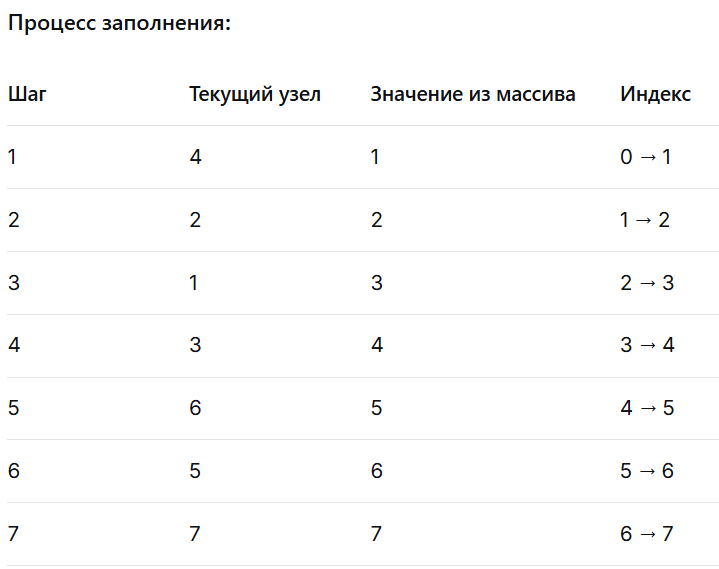

```python
        4
      /   \
     2     6
    / \   / \
   1   3 5   7

        1
      /   \
     2     5
    / \   / \
   3   4 6   7
```
- Inorder обход BST дает строго возрастающую последовательность

- Preorder обход гарантирует, что:

- - Корень получает минимальное значение

- - Левое поддерево получает следующие по величине значения

- - Правое поддерево получает оставшиеся значения

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def inorder_traversal(root, inorder_arr):
    """Собирает значения BST в отсортированном порядке"""
    if root is None:
        return

    # Рекурсивно обходим левое поддерево
    inorder_traversal(root.left, inorder_arr)
    # Добавляем текущий узел
    inorder_arr.append(root.data)
    # Рекурсивно обходим правое поддерево
    inorder_traversal(root.right, inorder_arr)

def preorder_fill(root, inorder_arr, index):
    """Заполняет дерево значениями из отсортированного массива в preorder порядке"""
    if root is None:
        return index

    # Заменяем значение текущего узла
    root.data = inorder_arr[index]
    index += 1  # Переходим к следующему элементу массива

    # Рекурсивно заполняем левое поддерево
    index = preorder_fill(root.left, inorder_arr, index)
    # Рекурсивно заполняем правое поддерево
    index = preorder_fill(root.right, inorder_arr, index)

    return index  # Возвращаем текущую позицию в массиве

def bstToMinHeap(root):
    """Основная функция преобразования BST в Min Heap"""
    inorder_arr = []  # Здесь будут храниться отсортированные значения

    # Шаг 1: Получаем отсортированные значения через inorder обход
    inorder_traversal(root, inorder_arr)

    # Шаг 2: Заполняем дерево значениями в preorder порядке
    preorder_fill(root, inorder_arr, 0)

def preorder_print(root):
    """Вспомогательная функция для вывода дерева"""
    if root is None:
        return
    print(root.data, end=" ")
    preorder_print(root.left)
    preorder_print(root.right)

# Создание тестового дерева
root = Node(4)
root.left = Node(2)
root.right = Node(6)
root.left.left = Node(1)
root.left.right = Node(3)
root.right.left = Node(5)
root.right.right = Node(7)

print("До преобразования (preorder):")
preorder_print(root)  # 4 2 1 3 6 5 7

bstToMinHeap(root)

print("\nПосле преобразования в Min Heap (preorder):")
preorder_print(root)  # 1 2 3 4 5 6 7

Сложность алгоритма:
- Время: $O(n)$ - два обхода дерева

- Память: $O(n)$ - хранение отсортированного массива

**Итоги:**
1. Упорядоченная структура:
Для любого узла X в дереве:

- Все значения в левом поддереве меньше значения узла X.

- Все значения в правом поддереве больше значения узла X.

2. Рекурсивное свойство:
- Каждое поддерево (левое и правое) также является двоичным деревом поиска.

3. Уникальность значений:
- В классическом BST все значения уникальны (дубликаты не допускаются).
- В некоторых реализациях дубликаты могут размещаться в правом поддереве (≥) или левом поддереве (≤).

4. Эффективность операций:

- Поиск, вставка и удаление в среднем выполняются за $O(log n)$, где $n$ — количество узлов.

- В худшем случае (вырожденное дерево) сложность операций достигает $O(n)$.

5. Симметричный обход (inorder traversal):
При обходе дерева в порядке «левый узел → корень → правый узел» значения выводятся в отсортированном порядке.

6. Минимальный и максимальный элементы:

- Минимальный элемент находится в самом левом узле дерева.

- Максимальный элемент находится в самом правом узле дерева.

7. Балансировка:

- BST не гарантирует сбалансированность. Высота дерева зависит от порядка вставки элементов.

- Для поддержания эффективности используются сбалансированные версии (AVL-деревья, красно-черные деревья).

8. Произвольная структура:
Форма дерева зависит от последовательности вставки элементов. Один и тот же набор значений может образовывать разные деревья.

### Квиз!!!
https://www.geeksforgeeks.org/quizzes/top-mcqs-on-binary-search-tree-bst-data-structure-with-answers/

# Прямые и обратные нотации

Рассмотрим арифметическое выражение
```
(2 − 3) ∗ (12 − 10) + 4 / 2
```
Его значение легко вычисляется и оказывается даже целым - это 0 (не забываем правила приоритета операций!). Это привычная для нас форма записи арифметических выражений, в которой если операция бинарная (т.е. требует 2 аргументов, например, сложение, деление), то один аргумент пишется перед знаком операции, а другой - после неё. Такая форма записи называется инфиксной.

Нотация (способ записи), в которой операнды пишутся перед знаком операции - называется постфиксной или обратной польской.

Нотация, в которой операнды пишутся после знака операции - прямой польской или префиксной.

Например, уже рассмотренное выражение в обратной польской записи будет выглядеть как
```
2 3 − 12 10 − ∗ 4 2 / +
```
После пары 2 и 3 стоит знак вычитания. После пары 12 и 10 - тоже. Далее стоит знак перемножения, потому что результаты этих двух операций надо умножить. Далее стоят 4 и 2 и после них знак деления. А после - знак сложения, показывающий, что результат предыдущего нужно сложить с результатом деления 4 на 2.

а в прямой польской как
```
+ ∗ − 2 3 − 12 10 / 4 2
```
Аналогичным образом, только теперь знак операции стоит перед операндами (или их описаниями в виде выражений в той же форме записи).

```python
Input: ["2", "1", "+", "3", "*"]
Output: 9
Explanation: ((2 + 1) * 3) = 9

Input: ["4", "13", "5", "/", "+"]
Output: 6
Explanation: (4 + (13 / 5)) = 6

Input: ["10", "6", "9", "3", "+", "-11", "*", "/", "*", "17", "+", "5", "+"]
Output: 22
Explanation:
  ((10 * (6 / ((9 + 3) * -11))) + 17) + 5
= ((10 * (6 / (12 * -11))) + 17) + 5
= ((10 * (6 / -132)) + 17) + 5
= ((10 * 0) + 17) + 5
= (0 + 17) + 5
= 17 + 5
= 22
```

В общем и целом, любое выражение можно представить в виде структуры, называемой деревом(синтаксическим деревом в данном случае, поскольку оно отражает структуру выражения). Например, для разобранного выражения синтаксическое дерево будет выглядеть так:


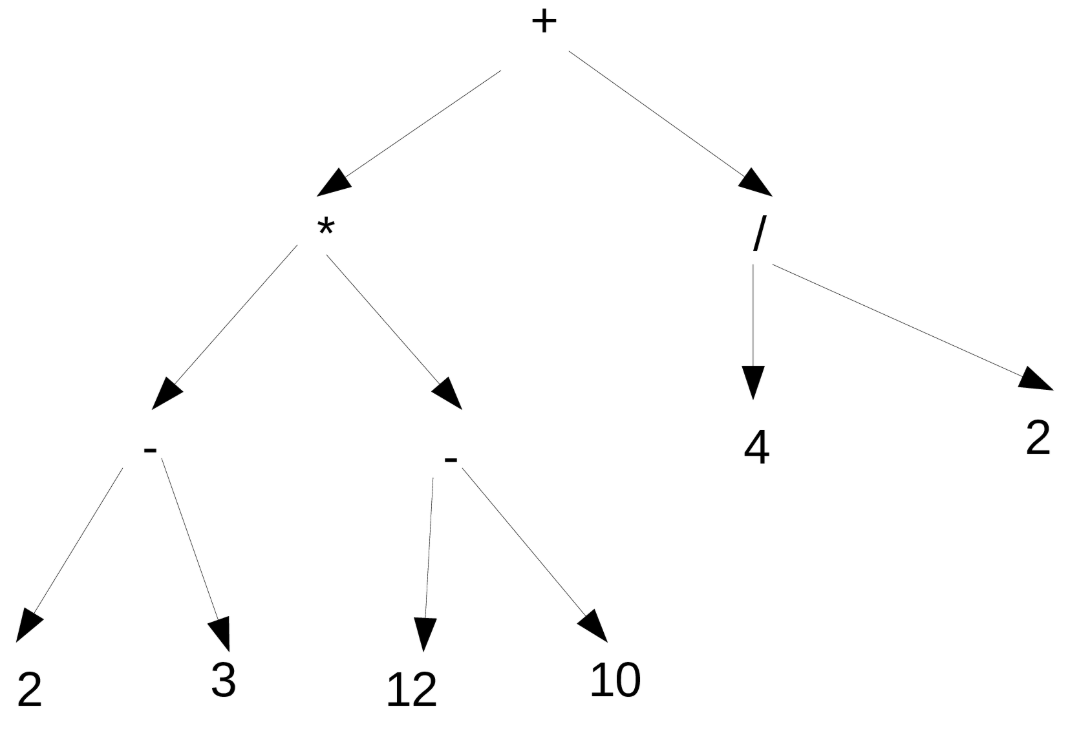

Его конечные вершины, листья (из которых стрелки никуда не идут) - это операнды, а промежуточные (из которых идут стрелки)- операции. Прямая польская запись (префиксная) получается, если читать это дерево сверху вниз. Обратная (постфиксная) - если читать снизу вверх.

### Сортировочная станция Дейкстры
Как нетрудно видеть: выражения в обратной польской записи удобны для чтения компьютером , но неудобны для чтения и составления людьми. Поэтому хотелось бы доверить труд составления постфиксной формы выражений по их привычной инфиксной форме компьютеру. Это можно сделать с помощью так называемого алгоритма сортировочной станции (Shunting Yard algorithm , придуман Э. Дейкстрой в 1961 году, см https://en.wikipedia.org/wiki/Shunting-yard_algorithm для трансляторов языка Algol60 https://ir.cwi.nl/pub/9251).

В следующем примере, взятом как раз из википедии, разбирается преобразование выражения

$a+b∗c−d$

Есть сортировочная станция с 3 путями: 2 подъездных и 1 тупик. С правоого подъездного пути едут выражения: в каждом "вагоне" или операнд или знак операции. Операнды свободно проезжают в левый путь (образуя очередь), а операторы заезжают в тупик.

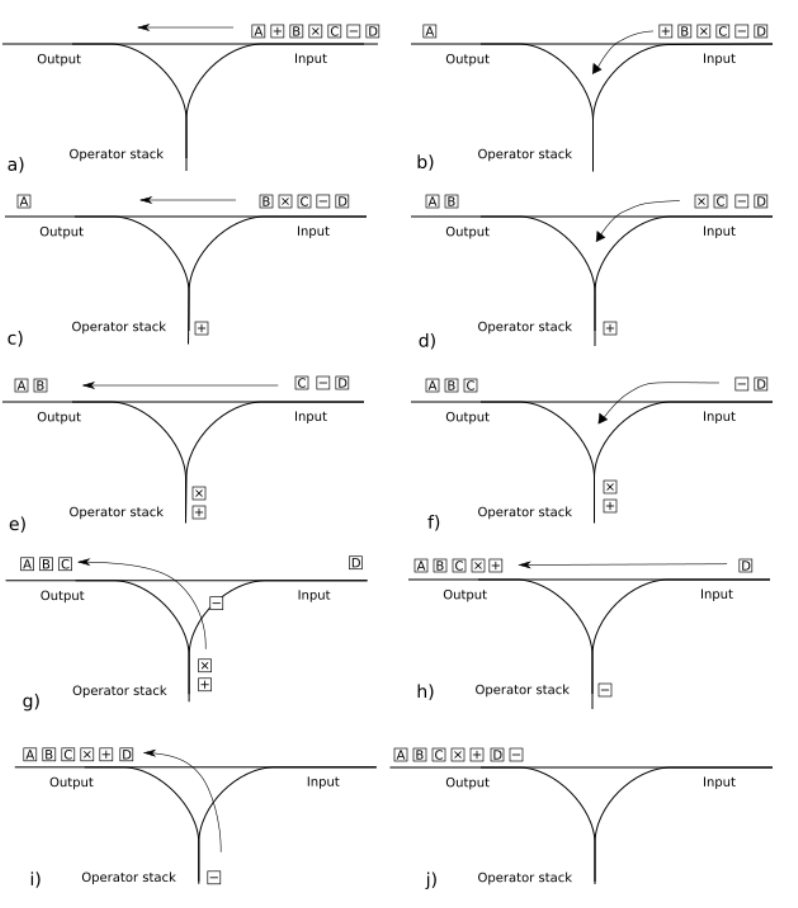